In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("swedish_insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
#this dataset is simple one with one independent x variable and one dependent y variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
#for this we can use simple linear regression
X = df['X'].values.reshape(-1,1)
Y = df['Y'].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=57)
#adding random state just for shufflin of data

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [8]:
y_pred = lin_reg.predict(X_test)

In [9]:
#as we now have y_pred and y_test to validate our model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
m1 = mean_absolute_error(y_pred,Y_test)
m2 = mean_squared_error(y_pred,Y_test)

In [10]:
m1

27.94410743786983

In [11]:
np.sqrt(m2)

35.06984941759613

In [12]:
Y.mean()

98.18730158730159

In [13]:
# as the model is behaving badly that means there are many outliers we may optimize it by removing the outliers

In [14]:
import seaborn as sns

C:\Users\akj29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

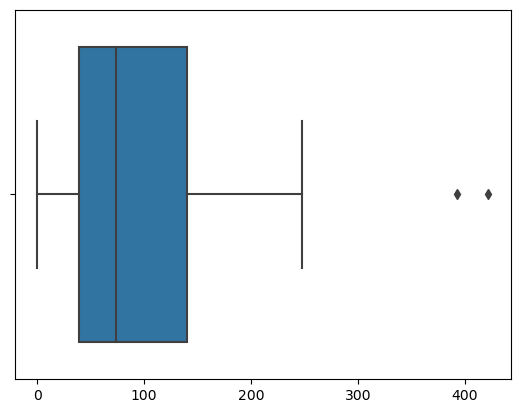

In [15]:
sns.boxplot(Y)

In [16]:
#we can drop the outliers for the y i.e. are easily 300 above


In [17]:
df=df.drop(index=0)
df=df.drop(index=3)
df

,X,Y
1,19,46.2
2,13,15.7
4,40,119.4
5,57,170.9
6,23,56.9
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [18]:
X_new = df['X'].values.reshape(-1,1)
Y_new = df['Y'].values.reshape(-1,1)
X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(X_new,Y_new,test_size=0.2,random_state=57)
lin_reg_new = LinearRegression()
lin_reg_new.fit(X_train_new,Y_train_new)
y_pred_new = lin_reg.predict(X_test_new)
m1 = mean_absolute_error(y_pred_new,Y_test_new)
m2 = mean_squared_error(y_pred_new,Y_test_new)

In [19]:
m1

20.623443405658918

In [20]:
m2

570.8146244576129

In [21]:
np.sqrt(m2)

23.8917271133255

In [22]:
#not much improvement
r2_score(Y_test_new,y_pred_new)

0.6121447360520849

In [23]:
r2_score(Y_test,y_pred)

0.8762715102894285